# Students Health and Academic Performance

#### We have gained important insights on the impact of mobile phone usage among students on academic success and performance predictors by examining the dataset. A more detailed understanding of the impact of mobile phones on attention span and daily routines can be obtained by examining how students perceive the influence of these devices on their studies, including distractions and usage patterns. These results can help develop solutions that encourage better academic achievement in school settings by encouraging healthier mobile phone usage and improving overall student well-being.

## 1. Which mobile phone activities are most commonly used for educational purposes?


### Gaining knowledge about the most popular mobile phone activities for education helps understand the unique effects these activities have on student engagement, academic achievement, and general well-being. 

### <u>Web browsing and messaging come in second and third, with 12 and 11 instances, respectively, while social media usage among students continues to lead the list with 32 occurrences, according to the study of the most recent data. This draws attention to the widespread use of social media as a possible topic of study to comprehend its impact on student behaviors and educational outcomes in digital learning environments.</u>

In [14]:
SELECT
    LTRIM(RTRIM(Activity)) AS Activity,
    COUNT(*) AS Frequency
FROM (
    SELECT
        TRIM(VALUE) AS Activity
    FROM StudentsHealth.dbo.Impact_of_Mobile_Phone_on_Students_Health
    CROSS APPLY STRING_SPLIT(Mobile_Phone_Activities, ';')
) AS SplitActivities
WHERE
    Activity LIKE '%Social Media%'
    OR Activity LIKE '%Web-browsing%'
    OR Activity LIKE '%Messaging%'
GROUP BY Activity
ORDER BY Frequency DESC;

(3 rows affected)

Total execution time: 00:00:00.026

Activity,Frequency
Social Media,32
Web-browsing,12
Messaging,11


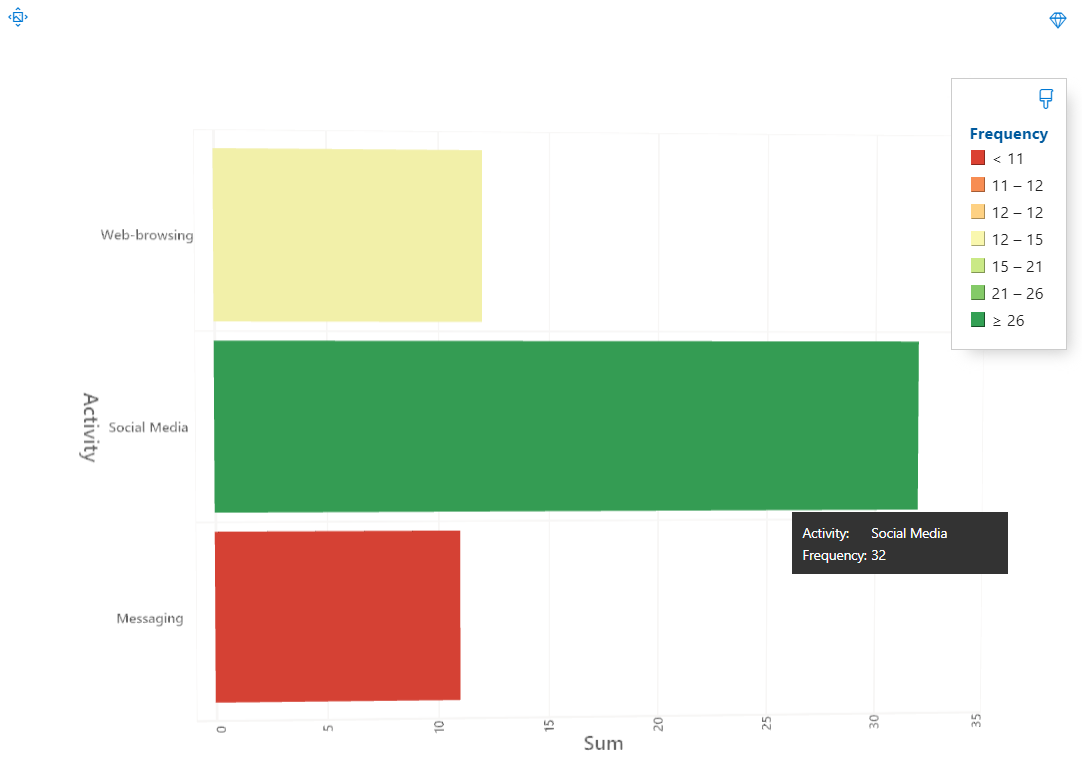

## 2. Is there a correlation between daily mobile phone usage and academic performance impact?


### This research examines the correlation between the frequency of daily mobile phone usage and its impact on academic performance among students. The findings reveal different usage patterns and their respective impacts on academic outcomes.

### Analysis of the data shows that students who frequently use mobile phones for education report an average impact score of 0.56, with 56% agreeing that mobile phone use affects their academic performance.

### These findings suggest a notable correlation between higher daily mobile phone usage for educational purposes and perceived impacts on academic performance, highlighting the need for balanced integration strategies to optimize learning outcomes in digital learning environments.

In [10]:
SELECT 
    Mobile_phone_use_for_education, 
    COUNT(*) AS TotalResponses,
    SUM(CASE WHEN Performance_Impact = 'Agree' THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS AvgImpact,
    SUM(CASE WHEN Performance_Impact = 'Agree' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS PercentageAgree,
    SUM(CASE WHEN Performance_Impact = 'Disagree' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS PercentageDisagree,
    SUM(CASE WHEN Performance_Impact = 'Neutral' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS PercentageNeutral
FROM 
    StudentsHealth.dbo.Impact_of_Mobile_Phone_on_Students_Health
WHERE Mobile_phone_use_for_education IS NOT NULL
GROUP BY 
    Mobile_phone_use_for_education;


(4 rows affected)

Total execution time: 00:00:00.012

Mobile_phone_use_for_education,TotalResponses,AvgImpact,PercentageAgree,PercentageDisagree,PercentageNeutral
Frequently,25,0.560000000000,56.000000000000,4.000000000000,12.000000000000
Never,10,0.200000000000,20.000000000000,10.000000000000,20.000000000000
Rarely,10,0.200000000000,20.000000000000,10.000000000000,30.000000000000
Sometimes,53,0.396226415094,39.622641509433,7.547169811320,37.735849056603


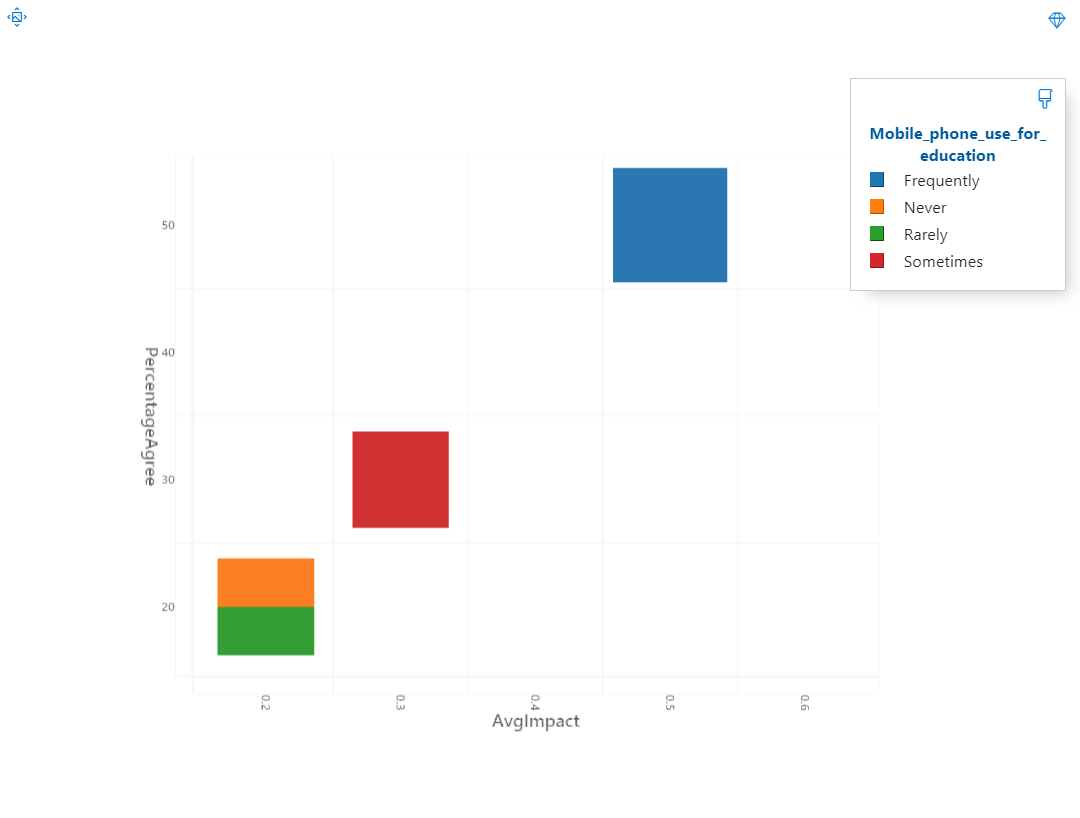

## 3. Are there any reported symptoms related to mobile phone usage that correlate with academic performance?


### This research analyzes reported symptoms related to mobile phone usage (e.g., sleep disturbances, anxiety or stress) and their correlation with academic performance indicators. It explores whether certain symptoms are more prevalent among students with varying levels of academic success.

### Investigating symptom correlations can provide insights into how mobile phone usage impacts students' overall well-being and academic success.

### <u>Results show that symptoms such as increased stress and sleep problems are more commonly reported by students who face academic issues. This emphasizes the necessity of precautionary measures and management techniques to lessen the negative effects of cell phone use on health and academic achievement.</u>

In [17]:
SELECT 
    Usage_Symptoms,
    COUNT(CASE WHEN Performance_Impact = 'Agree' THEN 1 END) AS Agree,
    COUNT(CASE WHEN Performance_Impact = 'Disagree' THEN 1 END) AS Disagree,
    COUNT(CASE WHEN Performance_Impact = 'Neutral' THEN 1 END) AS Neutral,
    COUNT(CASE WHEN Performance_Impact = 'Strongly Agree' THEN 1 END) AS StronglyAgree,
    COUNT(CASE WHEN Performance_Impact = 'Strongly Disagree' THEN 1 END) AS StronglyDisagree
FROM StudentsHealth.dbo.Impact_of_Mobile_Phone_on_Students_Health
WHERE Usage_Symptoms IN ('Sleep disturbance', 'Headaches', 'Anxiety or Stress', 'All of these')
GROUP BY Usage_Symptoms;



Warning: Null value is eliminated by an aggregate or other SET operation.

(3 rows affected)

Total execution time: 00:00:00.025

Usage_Symptoms,Agree,Disagree,Neutral,StronglyAgree,StronglyDisagree
All of these,11,2,8,7,4
Anxiety or Stress,4,0,4,2,2
Sleep disturbance,14,3,7,0,1


## 4. Do students who use mobile phones for education frequently report more symptoms of distraction during exams, lectures, or while studying?

### Exploring distractions during key academic periods helps in understanding how mobile technology influences focus and concentration among students.

### An examination of the data shows that students who use their phones for schooling on a regular basis report more distractions during tests (6), lectures (4), and study sessions (9). <u>On the other hand, there are less distractions during these times for students who say they have never used a mobile device for schooling (exams: 1, lectures: 1, studying: 2)</u>. The necessity for solutions to limit mobile device usage to improve learning environments and academic achievement is highlighted by the considerable association between frequent use of mobile phones for educational purposes and increasing distractions during critical study hours.

In [15]:
SELECT 
    Mobile_Phone_Use_For_Education,
    SUM(CASE WHEN Usage_Distraction = 'During Class Lectures' THEN 1 ELSE 0 END) AS During_Class_Lectures,
    SUM(CASE WHEN Usage_Distraction = 'During Exams' THEN 1 ELSE 0 END) AS During_Exams,
    SUM(CASE WHEN Usage_Distraction = 'Not Distracting' THEN 1 ELSE 0 END) AS Not_Distracting,
    SUM(CASE WHEN Usage_Distraction = 'While Studying' THEN 1 ELSE 0 END) AS While_Studying,
    COUNT(*) AS Frequency
FROM StudentsHealth.dbo.Impact_of_Mobile_Phone_on_Students_Health
WHERE Mobile_phone_use_for_education IS NOT NULL
GROUP BY Mobile_Phone_Use_For_Education;

(4 rows affected)

Total execution time: 00:00:00.011

Mobile_Phone_Use_For_Education,During_Class_Lectures,During_Exams,Not_Distracting,While_Studying,Frequency
Frequently,6,4,6,9,25
Never,5,1,2,2,10
Rarely,0,4,2,3,10
Sometimes,12,11,10,19,53


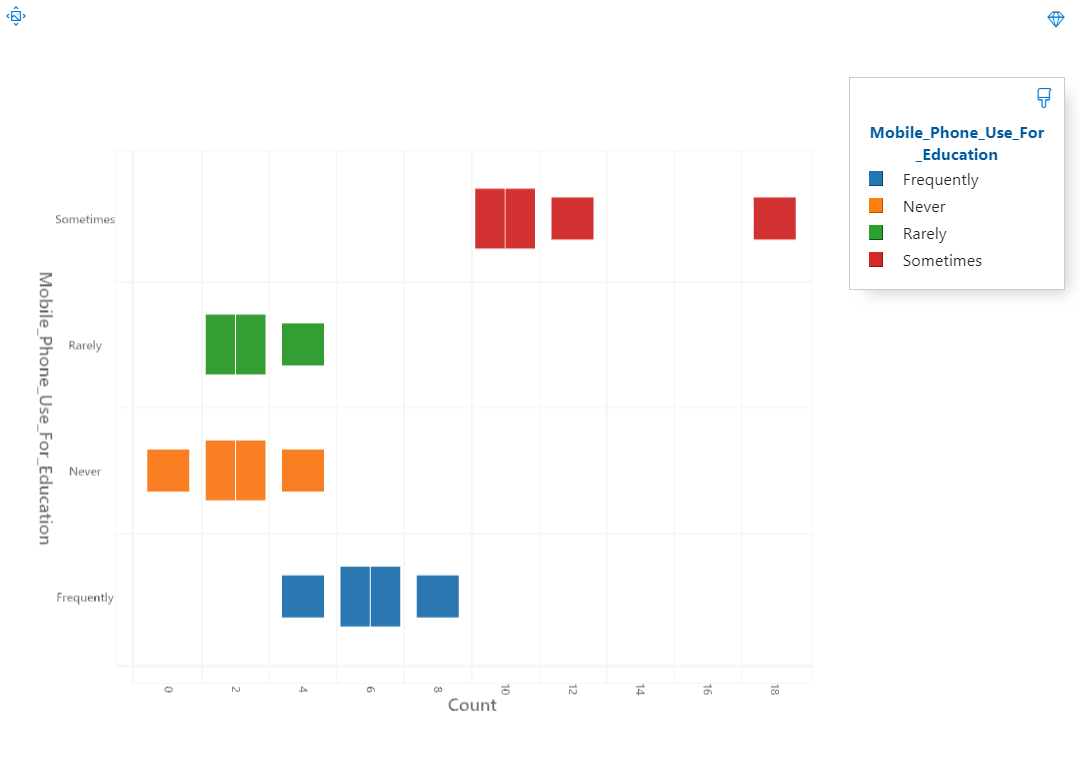

## 5.	Are students aware of potential health risks, and are they taking any health precautions?


### This study looks into whether students take preventative measures to lessen the health concerns that could arise from using a mobile phone for extended periods of time, such as eye strain and posture issues.

### Assessing awareness and health practices provides insights into students' proactive measures to maintain their well-being in the digital age.

### <u>The study reveals there is a level of awareness among students regarding health risks associated with mobile phone usage. While some students take proactive health precautions, such as using blue light filters or taking breaks, others may benefit from increased education on managing digital health.</u>

In [13]:
SELECT 
    Health_Risks,
    Health_Precautions,
    COUNT(*) AS TotalStudents
FROM StudentsHealth.dbo.Impact_of_Mobile_Phone_on_Students_Health
WHERE 
    Health_Risks = 1 AND Health_Precautions IS NOT NULL
GROUP BY 
    Health_Risks,
    Health_Precautions
ORDER BY TotalStudents DESC;

(4 rows affected)

Total execution time: 00:00:00.015

Health_Risks,Health_Precautions,TotalStudents
1,Limiting Screen Time,22
1,Taking Break during prolonged use,13
1,Using Blue light filter,12
1,None of Above,10


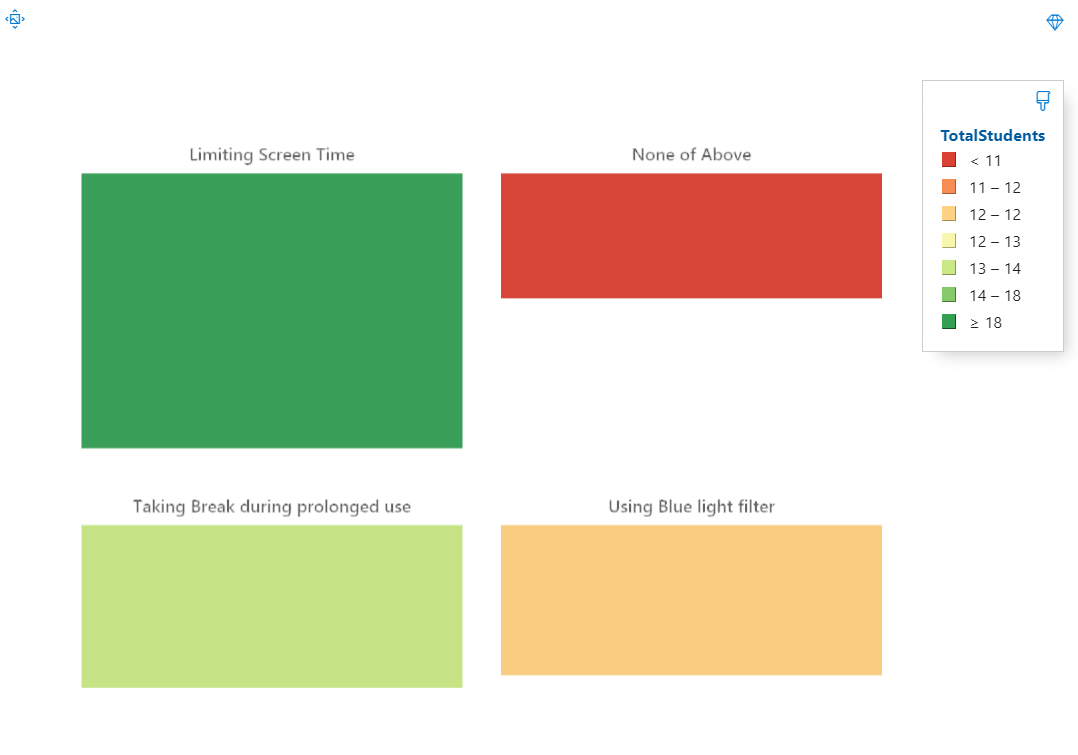